In [172]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

#importing classifiers:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier as xgb
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report

## Read CSV:

In [174]:
df = pd.read_csv('resumes.csv')
df.head()

,role,cleaned_data,file_name
0,peoplesoft,Anubhav Kumar Singh work globally competitive ...,Peoplesoft Admin_AnubhavSingh.docx
1,peoplesoft,profile Summary 7 year experience implement up...,Peoplesoft Admin_G Ananda Rayudu.doc
2,peoplesoft,PeopleSoft Database Administrator Gangareddy P...,Peoplesoft Admin_Gangareddy.doc
3,peoplesoft,murali experience Summary 6 year experience wo...,Peoplesoft Admin_Murali.docx
4,peoplesoft,Priyanka Ramadoss 61 46 MountPleasant Coonoor ...,Peoplesoft Admin_Priyanka Ramadoss.doc


## Feature and target column:

In [176]:
feature = df['cleaned_data']
target = df['role']

In [177]:
target.value_counts()

role
react_dev     24
workday       21
peoplesoft    20
sql_dev       14
Name: count, dtype: int64

## Applying tfidf :for converting text to numerical data

In [179]:
ct = CountVectorizer()

In [180]:
x = ct.fit_transform(feature)
x

<79x4099 sparse matrix of type '<class 'numpy.int64'>'
	with 18897 stored elements in Compressed Sparse Row format>

In [181]:
tfidf = TfidfTransformer()

In [182]:
x = tfidf.fit_transform(x)
x

<79x4099 sparse matrix of type '<class 'numpy.float64'>'
	with 18897 stored elements in Compressed Sparse Row format>

## split data into train test:

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size=0.2, random_state=50)

In [185]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(63, 4099) (16, 4099) (63,) (16,)


## Applying Smote: for imbalanced dataset to balanced

In [187]:
y_train.value_counts()

role
react_dev     21
workday       17
peoplesoft    16
sql_dev        9
Name: count, dtype: int64

In [188]:
sm = SMOTE()

In [189]:
x_train, y_train = sm.fit_resample(x_train, y_train)

In [190]:
y_train.value_counts()

role
workday       21
peoplesoft    21
sql_dev       21
react_dev     21
Name: count, dtype: int64

# Model build:

## 1. Logistic regression:

In [193]:
lr = LogisticRegression(multi_class='ovr')

In [194]:
lr.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

In [195]:
## Prediction:
## testing prediction:
y_pred = lr.predict(x_test)
## training prediction:
y_pred_1 = lr.predict(x_train)
print(y_pred)

['workday' 'peoplesoft' 'workday' 'sql_dev' 'peoplesoft' 'sql_dev'
 'workday' 'peoplesoft' 'react_dev' 'react_dev' 'sql_dev' 'sql_dev'
 'react_dev' 'react_dev' 'react_dev' 'workday']


In [196]:
## Scores:
lr_train_acc = round(accuracy_score(y_train, y_pred_1), 2)
lr_test_acc = round(accuracy_score(y_test, y_pred), 2)
lr_prec = round(precision_score(y_test,y_pred,average = 'macro'), 2)
lr_rec = round(recall_score(y_test,y_pred,average = 'macro'), 2)
lr_f1 = round(f1_score(y_test,y_pred,average = 'macro'), 2)
print('train_accuracy_score :', lr_train_acc)
print('test_accuracy_score :', lr_test_acc)
print('precision_score :', lr_prec)
print('recall_score :', lr_rec)
print('f1_score :', lr_f1)

train_accuracy_score : 1.0
test_accuracy_score : 0.88
precision_score : 0.9
recall_score : 0.89
f1_score : 0.87


In [197]:
cl = classification_report(y_test, y_pred)
print('classification report of lr_model :')
print(cl)

classification report of lr_model :
              precision    recall  f1-score   support

  peoplesoft       1.00      0.75      0.86         4
   react_dev       0.60      1.00      0.75         3
     sql_dev       1.00      0.80      0.89         5
     workday       1.00      1.00      1.00         4

    accuracy                           0.88        16
   macro avg       0.90      0.89      0.87        16
weighted avg       0.93      0.88      0.88        16



## 2. Multinomial NaiveBayes :

In [199]:
mnb = MultinomialNB()

In [200]:
mnb.fit(x_train, y_train)

MultinomialNB()

In [201]:
## Prediction:
## testing prediction:
y_pred = mnb.predict(x_test)
## training prediction:
y_pred_1 = mnb.predict(x_train)
print(y_pred)

['workday' 'peoplesoft' 'workday' 'sql_dev' 'peoplesoft' 'sql_dev'
 'workday' 'peoplesoft' 'react_dev' 'workday' 'sql_dev' 'sql_dev'
 'sql_dev' 'react_dev' 'react_dev' 'workday']


In [202]:
## Scores:
mnb_train_acc = round(accuracy_score(y_train, y_pred_1), 2)
mnb_test_acc = round(accuracy_score(y_test, y_pred), 2)
mnb_prec = round(precision_score(y_test,y_pred,average = 'macro'), 2)
mnb_rec = round(recall_score(y_test,y_pred,average = 'macro'), 2)
mnb_f1 = round(f1_score(y_test,y_pred,average = 'macro'), 2)
print('train_accuracy_score :', mnb_train_acc)
print('test_accuracy_score :', mnb_test_acc)
print('precision_score :', mnb_prec)
print('recall_score :', mnb_rec)
print('f1_score :', mnb_f1)

train_accuracy_score : 1.0
test_accuracy_score : 0.94
precision_score : 0.95
recall_score : 0.94
f1_score : 0.94


In [203]:
cl = classification_report(y_test, y_pred)
print('classification report of mnb_model :')
print(cl)

classification report of mnb_model :
              precision    recall  f1-score   support

  peoplesoft       1.00      0.75      0.86         4
   react_dev       1.00      1.00      1.00         3
     sql_dev       1.00      1.00      1.00         5
     workday       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.95      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16



## 3. Support vector classifier:

In [205]:
svc = SVC(C=1, kernel='rbf', gamma=0.3)
svc.fit(x_train, y_train)

SVC(C=1, gamma=0.3)

In [206]:
## Prediction:
## testing prediction:
y_pred = svc.predict(x_test)
## training prediction:
y_pred_1 = svc.predict(x_train)
print(y_pred)

['workday' 'peoplesoft' 'workday' 'sql_dev' 'peoplesoft' 'sql_dev'
 'workday' 'peoplesoft' 'react_dev' 'react_dev' 'sql_dev' 'sql_dev'
 'react_dev' 'react_dev' 'react_dev' 'workday']


In [207]:
## Scores:
svc_train_acc = round(accuracy_score(y_train, y_pred_1), 2)
svc_test_acc = round(accuracy_score(y_test, y_pred), 2)
svc_prec = round(precision_score(y_test,y_pred,average = 'macro'), 2)
svc_rec = round(recall_score(y_test,y_pred,average = 'macro'), 2)
svc_f1 = round(f1_score(y_test,y_pred,average = 'macro'), 2)
print('train_accuracy_score :', svc_train_acc)
print('test_accuracy_score :', svc_test_acc)
print('precision_score :', svc_prec)
print('recall_score :', svc_rec)
print('f1_score :', svc_f1)

train_accuracy_score : 1.0
test_accuracy_score : 0.88
precision_score : 0.9
recall_score : 0.89
f1_score : 0.87


In [208]:
cl = classification_report(y_test, y_pred)
print('classification report of svc_model :')
print(cl)

classification report of svc_model :
              precision    recall  f1-score   support

  peoplesoft       1.00      0.75      0.86         4
   react_dev       0.60      1.00      0.75         3
     sql_dev       1.00      0.80      0.89         5
     workday       1.00      1.00      1.00         4

    accuracy                           0.88        16
   macro avg       0.90      0.89      0.87        16
weighted avg       0.93      0.88      0.88        16



## 4. Decission Tree classifier:

In [210]:
dtc = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=3)

In [211]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, splitter='random')

In [212]:
## Prediction:
## testing prediction:
y_pred = dtc.predict(x_test)
## training prediction:
y_pred_1 = dtc.predict(x_train)
print(y_pred)

['workday' 'peoplesoft' 'workday' 'react_dev' 'peoplesoft' 'sql_dev'
 'workday' 'peoplesoft' 'react_dev' 'peoplesoft' 'react_dev' 'react_dev'
 'react_dev' 'react_dev' 'react_dev' 'workday']


In [213]:
## Scores:
dtc_train_acc = round(accuracy_score(y_train, y_pred_1), 2)
dtc_test_acc = round(accuracy_score(y_test, y_pred), 2)
dtc_prec = round(precision_score(y_test,y_pred,average = 'macro'), 2)
dtc_rec = round(recall_score(y_test,y_pred,average = 'macro'), 2)
dtc_f1 = round(f1_score(y_test,y_pred,average = 'macro'), 2)
print('train_accuracy_score :', dtc_train_acc)
print('test_accuracy_score :', dtc_test_acc)
print('precision_score :', dtc_prec)
print('recall_score :', dtc_rec)
print('f1_score :', dtc_f1)

train_accuracy_score : 1.0
test_accuracy_score : 0.75
precision_score : 0.86
recall_score : 0.8
f1_score : 0.73


In [214]:
cl = classification_report(y_test, y_pred)
print('classification report of dtc_model :')
print(cl)

classification report of dtc_model :
              precision    recall  f1-score   support

  peoplesoft       1.00      1.00      1.00         4
   react_dev       0.43      1.00      0.60         3
     sql_dev       1.00      0.20      0.33         5
     workday       1.00      1.00      1.00         4

    accuracy                           0.75        16
   macro avg       0.86      0.80      0.73        16
weighted avg       0.89      0.75      0.72        16



## 5. KNN Classifier:

In [216]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [217]:
## Prediction:
## testing prediction:
y_pred = knn.predict(x_test)
## training prediction:
y_pred_1 = knn.predict(x_train)
print(y_pred)

['workday' 'peoplesoft' 'workday' 'sql_dev' 'sql_dev' 'sql_dev' 'workday'
 'peoplesoft' 'sql_dev' 'sql_dev' 'sql_dev' 'sql_dev' 'sql_dev' 'sql_dev'
 'react_dev' 'workday']


In [218]:
## Scores:
knn_train_acc = round(accuracy_score(y_train, y_pred_1), 2)
knn_test_acc = round(accuracy_score(y_test, y_pred), 2)
knn_prec = round(precision_score(y_test,y_pred,average = 'macro'), 2)
knn_rec = round(recall_score(y_test,y_pred,average = 'macro'), 2)
knn_f1 = round(f1_score(y_test,y_pred,average = 'macro'), 2)
print('train_accuracy_score :', knn_train_acc)
print('test_accuracy_score :', knn_test_acc)
print('precision_score :', knn_prec)
print('recall_score :', knn_rec)
print('f1_score :', knn_f1)

train_accuracy_score : 0.89
test_accuracy_score : 0.75
precision_score : 0.89
recall_score : 0.71
f1_score : 0.72


In [219]:
cl = classification_report(y_test, y_pred)
print('classification report of knn_model :')
print(cl)

classification report of knn_model :
              precision    recall  f1-score   support

  peoplesoft       1.00      0.50      0.67         4
   react_dev       1.00      0.33      0.50         3
     sql_dev       0.56      1.00      0.71         5
     workday       1.00      1.00      1.00         4

    accuracy                           0.75        16
   macro avg       0.89      0.71      0.72        16
weighted avg       0.86      0.75      0.73        16



## 6. Gradient Boost Classifier:

In [221]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, subsample=0.9)

In [222]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=50, subsample=0.9)

In [223]:
## Prediction:
## testing prediction:
y_pred = gbc.predict(x_test)
## training prediction:
y_pred_1 = gbc.predict(x_train)
print(y_pred)

['workday' 'peoplesoft' 'workday' 'sql_dev' 'peoplesoft' 'sql_dev'
 'workday' 'peoplesoft' 'react_dev' 'peoplesoft' 'sql_dev' 'sql_dev'
 'sql_dev' 'react_dev' 'react_dev' 'workday']


In [224]:
## Scores:
gbc_train_acc = round(accuracy_score(y_train, y_pred_1), 2)
gbc_test_acc = round(accuracy_score(y_test, y_pred), 2)
gbc_prec = round(precision_score(y_test,y_pred,average = 'macro'), 2)
gbc_rec = round(recall_score(y_test,y_pred,average = 'macro'), 2)
gbc_f1 = round(f1_score(y_test,y_pred,average = 'macro'), 2)
print('train_accuracy_score :', gbc_train_acc)
print('test_accuracy_score :', gbc_test_acc)
print('precision_score :', gbc_prec)
print('recall_score :', gbc_rec)
print('f1_score :', gbc_f1)

train_accuracy_score : 1.0
test_accuracy_score : 1.0
precision_score : 1.0
recall_score : 1.0
f1_score : 1.0


In [225]:
cl = classification_report(y_test, y_pred)
print('classification report of gbc_model :')
print(cl)

classification report of gbc_model :
              precision    recall  f1-score   support

  peoplesoft       1.00      1.00      1.00         4
   react_dev       1.00      1.00      1.00         3
     sql_dev       1.00      1.00      1.00         5
     workday       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



## 7. Xtream Gradient Boost classifier:

In [227]:
## Label encoder : (due to xgboost expected numerical data of target variable)
lb = LabelEncoder()
y_train_new = lb.fit_transform(y_train)

In [228]:
xgbc = xgb(learning_rate=0.1, gamma=10, reg_lambda=1, n_estimator=50, min_child_weight=2)

In [229]:
xgbc.fit(x_train, y_train_new)

C:\Users\mpapu\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:46:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=10, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=50, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [230]:
## Prediction:
## testing prediction:
y_pred = xgbc.predict(x_test)
y_pred = lb.inverse_transform(y_pred)
## training prediction:
y_pred_1 = xgbc.predict(x_train)
y_pred_1 = lb.inverse_transform(y_pred_1)
print(y_pred)

['workday' 'peoplesoft' 'workday' 'react_dev' 'peoplesoft' 'sql_dev'
 'workday' 'peoplesoft' 'react_dev' 'peoplesoft' 'react_dev' 'react_dev'
 'react_dev' 'react_dev' 'react_dev' 'workday']


In [231]:
## Scores:
xgbc_train_acc = round(accuracy_score(y_train, y_pred_1), 2)
xgbc_test_acc = round(accuracy_score(y_test, y_pred), 2)
xgbc_prec = round(precision_score(y_test,y_pred,average = 'macro'), 2)
xgbc_rec = round(recall_score(y_test,y_pred,average = 'macro'), 2)
xgbc_f1 = round(f1_score(y_test,y_pred,average = 'macro'), 2)
print('train_accuracy_score :', xgbc_train_acc)
print('test_accuracy_score :', xgbc_test_acc)
print('precision_score :', xgbc_prec)
print('recall_score :', xgbc_rec)
print('f1_score :', xgbc_f1)

train_accuracy_score : 1.0
test_accuracy_score : 0.75
precision_score : 0.86
recall_score : 0.8
f1_score : 0.73


In [232]:
cl = classification_report(y_test, y_pred)
print('classification report of xgbc_model :')
print(cl)

classification report of xgbc_model :
              precision    recall  f1-score   support

  peoplesoft       1.00      1.00      1.00         4
   react_dev       0.43      1.00      0.60         3
     sql_dev       1.00      0.20      0.33         5
     workday       1.00      1.00      1.00         4

    accuracy                           0.75        16
   macro avg       0.86      0.80      0.73        16
weighted avg       0.89      0.75      0.72        16



## 8. AdaBoost Classifier:

In [234]:
abc = AdaBoostClassifier(n_estimators=100)
abc.fit(x_train, y_train)

C:\Users\mpapu\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100)

In [235]:
## Prediction:
## testing prediction:
y_pred = abc.predict(x_test)
## training prediction:
y_pred_1 = abc.predict(x_train)
print(y_pred)

['workday' 'peoplesoft' 'peoplesoft' 'peoplesoft' 'peoplesoft' 'sql_dev'
 'workday' 'peoplesoft' 'peoplesoft' 'peoplesoft' 'peoplesoft'
 'peoplesoft' 'peoplesoft' 'peoplesoft' 'peoplesoft' 'workday']


In [236]:
## Scores:
abc_train_acc = round(accuracy_score(y_train, y_pred_1), 2)
abc_test_acc = round(accuracy_score(y_test, y_pred), 2)
abc_prec = round(precision_score(y_test,y_pred,average = 'macro'), 2)
abc_rec = round(recall_score(y_test,y_pred,average = 'macro'), 2)
abc_f1 = round(f1_score(y_test,y_pred,average = 'macro'), 2)
print('train_accuracy_score :', abc_train_acc)
print('test_accuracy_score :', abc_test_acc)
print('precision_score :', abc_prec)
print('recall_score :', abc_rec)
print('f1_score :', abc_f1)

train_accuracy_score : 0.75
test_accuracy_score : 0.5
precision_score : 0.58
recall_score : 0.49
f1_score : 0.42


C:\Users\mpapu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [237]:
cl = classification_report(y_test, y_pred)
print('classification report of abc_model :')
print(cl)

classification report of abc_model :
              precision    recall  f1-score   support

  peoplesoft       0.33      1.00      0.50         4
   react_dev       0.00      0.00      0.00         3
     sql_dev       1.00      0.20      0.33         5
     workday       1.00      0.75      0.86         4

    accuracy                           0.50        16
   macro avg       0.58      0.49      0.42        16
weighted avg       0.65      0.50      0.44        16



C:\Users\mpapu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mpapu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mpapu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 9. Bagging Classifier:

In [239]:
bagc = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, max_samples=1.0, max_features=0.9, bootstrap=True)

In [240]:
bagc.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=0.9,
                  n_estimators=50)

In [241]:
## Prediction:
## testing prediction:
y_pred = bagc.predict(x_test)
## training prediction:
y_pred_1 = bagc.predict(x_train)
print(y_pred)

['workday' 'peoplesoft' 'workday' 'react_dev' 'peoplesoft' 'sql_dev'
 'workday' 'peoplesoft' 'react_dev' 'peoplesoft' 'sql_dev' 'react_dev'
 'react_dev' 'react_dev' 'react_dev' 'workday']


In [242]:
## Scores:
bagc_train_acc = round(accuracy_score(y_train, y_pred_1), 2)
bagc_test_acc = round(accuracy_score(y_test, y_pred), 2)
bagc_prec = round(precision_score(y_test,y_pred,average = 'macro'), 2)
bagc_rec = round(recall_score(y_test,y_pred,average = 'macro'), 2)
bagc_f1 = round(f1_score(y_test,y_pred,average = 'macro'), 2)
print('train_accuracy_score :', bagc_train_acc)
print('test_accuracy_score :', bagc_test_acc)
print('precision_score :', bagc_prec)
print('recall_score :', bagc_rec)
print('f1_score :', bagc_f1)

train_accuracy_score : 1.0
test_accuracy_score : 0.81
precision_score : 0.88
recall_score : 0.85
f1_score : 0.81


In [243]:
cl = classification_report(y_test, y_pred)
print('classification report of bagc_model :')
print(cl)

classification report of bagc_model :
              precision    recall  f1-score   support

  peoplesoft       1.00      1.00      1.00         4
   react_dev       0.50      1.00      0.67         3
     sql_dev       1.00      0.40      0.57         5
     workday       1.00      1.00      1.00         4

    accuracy                           0.81        16
   macro avg       0.88      0.85      0.81        16
weighted avg       0.91      0.81      0.80        16



## 10. Random forest Classifier:

In [245]:
rfc = RandomForestClassifier(n_estimators=50, max_samples=1.0, max_features='log2', bootstrap=True)

In [246]:
rfc.fit(x_train, y_train)

RandomForestClassifier(max_features='log2', max_samples=1.0, n_estimators=50)

In [247]:
## Prediction:
## testing prediction:
y_pred = rfc.predict(x_test)
## training prediction:
y_pred_1 = rfc.predict(x_train)
print(y_pred)

['workday' 'react_dev' 'workday' 'react_dev' 'peoplesoft' 'sql_dev'
 'workday' 'peoplesoft' 'react_dev' 'react_dev' 'sql_dev' 'react_dev'
 'react_dev' 'react_dev' 'react_dev' 'workday']


In [248]:
## Scores:
rfc_train_acc = round(accuracy_score(y_train, y_pred_1), 2)
rfc_test_acc = round(accuracy_score(y_test, y_pred), 2)
rfc_prec = round(precision_score(y_test,y_pred,average = 'macro'), 2)
rfc_rec = round(recall_score(y_test,y_pred,average = 'macro'), 2)
rfc_f1 = round(f1_score(y_test,y_pred,average = 'macro'), 2)
print('train_accuracy_score :', rfc_train_acc)
print('test_accuracy_score :', rfc_test_acc)
print('precision_score :', rfc_prec)
print('recall_score :', rfc_rec)
print('f1_score :', rfc_f1)

train_accuracy_score : 1.0
test_accuracy_score : 0.69
precision_score : 0.84
recall_score : 0.72
f1_score : 0.7


In [249]:
cl = classification_report(y_test, y_pred)
print('classification report of rfc_model :')
print(cl)

classification report of rfc_model :
              precision    recall  f1-score   support

  peoplesoft       1.00      0.50      0.67         4
   react_dev       0.38      1.00      0.55         3
     sql_dev       1.00      0.40      0.57         5
     workday       1.00      1.00      1.00         4

    accuracy                           0.69        16
   macro avg       0.84      0.72      0.70        16
weighted avg       0.88      0.69      0.70        16



# Model Evaluation:

In [251]:
dict = {'Models':['Logistic', 'MultiNB', 'SVC', 'DecissionTree', 'KNN', 'GradientBoost', 'XGBoost', 'AdaBoost', 'Bagging', 'Randomforest'], 
        'Training_accuracy':[lr_train_acc, mnb_train_acc, svc_train_acc, dtc_train_acc, knn_train_acc, gbc_train_acc, xgbc_train_acc, abc_train_acc, bagc_train_acc, rfc_train_acc], 
        'Testing_accuracy':[lr_test_acc, mnb_test_acc, svc_test_acc, dtc_test_acc, knn_test_acc, gbc_test_acc, xgbc_test_acc, abc_test_acc, bagc_test_acc, rfc_test_acc], 
        'Precision':[lr_prec, mnb_prec, svc_prec, dtc_prec, knn_prec, gbc_prec, xgbc_prec, abc_prec, bagc_prec, rfc_prec], 
        'Recal':[lr_rec, mnb_rec, svc_rec, dtc_rec, knn_rec, gbc_rec, xgbc_rec, abc_rec, bagc_rec, rfc_rec], 
        'f1_score':[lr_f1, mnb_f1, svc_f1, dtc_f1, knn_f1, gbc_f1, xgbc_f1, abc_f1, bagc_f1, rfc_f1]}

In [252]:
## creating dataframe:
model_scores = pd.DataFrame(dict)
model_scores

,Models,Training_accuracy,Testing_accuracy,Precision,Recal,f1_score
0,Logistic,1.00,0.88,0.90,0.89,0.87
1,MultiNB,1.00,0.94,0.95,0.94,0.94
2,SVC,1.00,0.88,0.90,0.89,0.87
3,DecissionTree,1.00,0.75,0.86,0.80,0.73
4,KNN,0.89,0.75,0.89,0.71,0.72
5,GradientBoost,1.00,1.00,1.00,1.00,1.00
6,XGBoost,1.00,0.75,0.86,0.80,0.73
7,AdaBoost,0.75,0.50,0.58,0.49,0.42
8,Bagging,1.00,0.81,0.88,0.85,0.81
9,Randomforest,1.00,0.69,0.84,0.72,0.70


## Score Visualization:

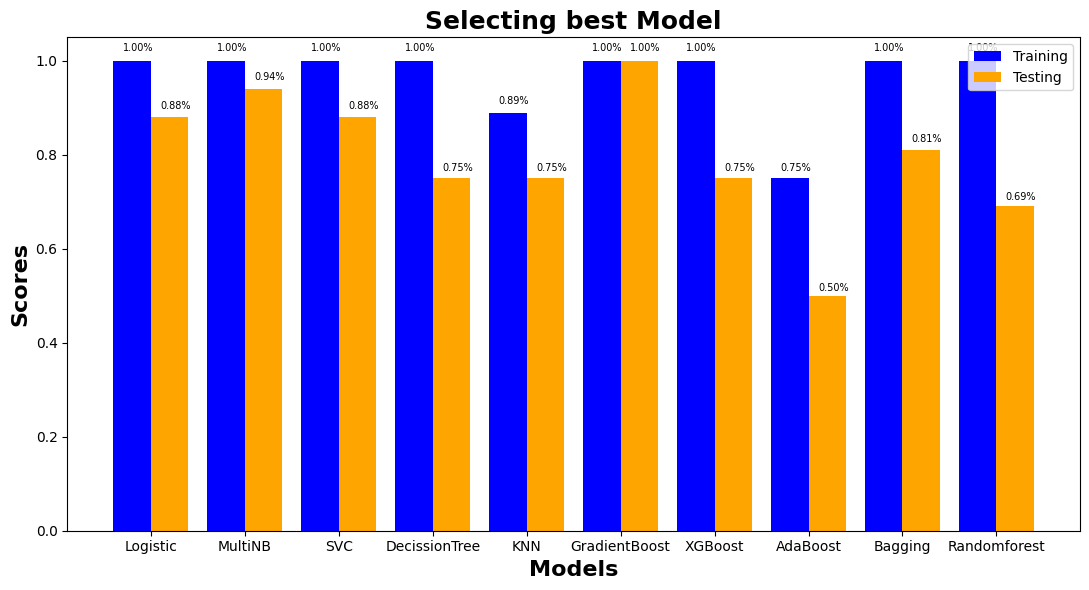

In [254]:
## Selecting model by visualizing scores:
models = ['Logistic', 'MultiNB', 'SVC', 'DecissionTree', 'KNN', 'GradientBoost', 'XGBoost', 'AdaBoost', 'Bagging', 'Randomforest']
trainig_scores = [lr_train_acc, mnb_train_acc, svc_train_acc, dtc_train_acc, knn_train_acc, gbc_train_acc, xgbc_train_acc, abc_train_acc, bagc_train_acc, rfc_train_acc]
testing_scores = [lr_test_acc, mnb_test_acc, svc_test_acc, dtc_test_acc, knn_test_acc, gbc_test_acc, xgbc_test_acc, abc_test_acc, bagc_test_acc, rfc_test_acc]

# Positions for the bars
x = np.arange(len(models))
bar_width = 0.4

# Create the plot
fig, ax = plt.subplots(figsize=(11, 6))

# Bars for the training group
bars1 = ax.bar(x - bar_width/2, trainig_scores, bar_width, label='Training', color='blue')
# Bars for the testing group
bars2 = ax.bar(x + bar_width/2, testing_scores, bar_width, label='Testing', color='orange')

# Add value labels on top of bars
for i, bar in enumerate(bars1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(trainig_scores[i]), fontsize = 7)
    
for i, bar in enumerate(bars2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(testing_scores[i]), fontsize = 7)

# Customize the plot
ax.set_xlabel('Models', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('Scores', fontsize = 16, fontweight = 'bold')
ax.set_title('Selecting best Model', fontsize = 18, fontweight = 'bold')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Exporting model for deployment:

In [256]:
##1st creating a pipeline ,where all vectorizer and model will transfered at a time:
model = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', gbc)
])

##Train the Model
model.fit(feature, target)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.5, n_estimators=50,
                                            subsample=0.9))])

In [257]:
filename = 'model_Gb.pkl'
pickle.dump(model,open(filename,'wb'))